In [140]:
import os
import plaid
import requests
import datetime
from pathlib import Path
import json
import pandas as pd
import numpy as np
%matplotlib inline

In [141]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [142]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SECRET')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')


# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [143]:
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')
#INSTITUTION_ID = "ins_109508"


In [144]:
client

In [145]:
INSTITUTION_ID = "ins_109508"

In [146]:
api-key = 'tjhwakjgfhkasjdhfsajdflsj$$$'

api_request = 'https://www.plaid.com/api/'

SyntaxError: can't assign to operator (<ipython-input-146-c6aedea3d5e6>, line 1)

### 2. Generate a public token

In [147]:
# YOUR CODE HERE
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

### 3. Exchange the public token for an access token

In [148]:
# YOUR CODE HERE
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])


In [149]:
# Store access token as variable
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [150]:
# YOUR CODE HERE
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'XMjVM7G1ePuoZqMR1W8eSzw7BE484etdMJwqy',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'DWdzWbqRL7cGeRK3QwVksMlqNR6g6bhvldKx7',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'VQNyQPL1j4Hre9D7lmgJteMyBvnQnEHW5l3eD',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

1.Fetch the Transactions for the last 90 days

In [151]:
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

transaction_response = client.Transactions.get(access_token,start_date,end_date)



### 2. Print the categories for each transaction

In [152]:
# YOUR CODE HERE
print(json.dumps(transaction_response['transactions'][:2],indent=4, sort_keys=True))

[
    {
        "account_id": "wp8XpalAGEuq145weXZPhznRjAx4x9tryMBjM",
        "account_owner": null,
        "amount": 500,
        "authorized_date": null,
        "category": [
            "Travel",
            "Airlines and Aviation Services"
        ],
        "category_id": "22001000",
        "date": "2020-01-31",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "United Airlines",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pendi

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [153]:
# YOUR CODE HERE
df = pd.DataFrame(transaction_response['transactions'])

In [154]:
df.head()

,account_id,account_owner,amount,authorized_date,category,category_id,date,iso_currency_code,location,name,payment_channel,payment_meta,pending,pending_transaction_id,transaction_id,transaction_type,unofficial_currency_code
0,wp8XpalAGEuq145weXZPhznRjAx4x9tryMBjM,None,500.00,None,"[Travel, Airlines and Aviation Services]",22001000,2020-01-31,USD,"{'address': None, 'city': None, 'country': Non...",United Airlines,in store,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,WZPyZjM87NFpQ3Aqw98lfZ1re5QBndClNxJ1l,special,None
1,XMjVM7G1ePuoZqMR1W8eSzw7BE484etdMJwqy,None,6.33,None,"[Travel, Taxi]",22016000,2020-01-29,USD,"{'address': None, 'city': None, 'country': Non...",Uber,in store,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,ZLmyLQMgZ7uBvMAWq7p5CJgD1bERMAtgwWdXE,special,None
2,wp8XpalAGEuq145weXZPhznRjAx4x9tryMBjM,None,500.00,None,"[Food and Drink, Restaurants]",13005000,2020-01-26,USD,"{'address': None, 'city': None, 'country': Non...",Tectra Inc,in store,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,AgBkgAVQZNCBJ87XjR5LCmyGd6k8rEc1VMnA9,place,None
3,wp8XpalAGEuq145weXZPhznRjAx4x9tryMBjM,None,2078.50,None,[Payment],16000000,2020-01-25,USD,"{'address': None, 'city': None, 'country': Non...",AUTOMATIC PAYMENT - THANK,other,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,blmzlkX3GEiqA6BjDvZmhpzkM8vx7VtV9PMZ3,special,None
4,wp8XpalAGEuq145weXZPhznRjAx4x9tryMBjM,None,500.00,None,"[Food and Drink, Restaurants, Fast Food]",13005032,2020-01-25,USD,"{'address': None, 'city': None, 'country': Non...",KFC,in store,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,nP8QPlDpGEup4VzRwmXNfwpLQyrGbDt67DLWK,place,None


In [155]:
df.set_index(['date']).head()

,account_id,account_owner,amount,authorized_date,category,category_id,iso_currency_code,location,name,payment_channel,payment_meta,pending,pending_transaction_id,transaction_id,transaction_type,unofficial_currency_code
date,,,,,,,,,,,,,,,,
2020-01-31,wp8XpalAGEuq145weXZPhznRjAx4x9tryMBjM,None,500.00,None,"[Travel, Airlines and Aviation Services]",22001000,USD,"{'address': None, 'city': None, 'country': Non...",United Airlines,in store,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,WZPyZjM87NFpQ3Aqw98lfZ1re5QBndClNxJ1l,special,None
2020-01-29,XMjVM7G1ePuoZqMR1W8eSzw7BE484etdMJwqy,None,6.33,None,"[Travel, Taxi]",22016000,USD,"{'address': None, 'city': None, 'country': Non...",Uber,in store,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,ZLmyLQMgZ7uBvMAWq7p5CJgD1bERMAtgwWdXE,special,None
2020-01-26,wp8XpalAGEuq145weXZPhznRjAx4x9tryMBjM,None,500.00,None,"[Food and Drink, Restaurants]",13005000,USD,"{'address': None, 'city': None, 'country': Non...",Tectra Inc,in store,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,AgBkgAVQZNCBJ87XjR5LCmyGd6k8rEc1VMnA9,place,None
2020-01-25,wp8XpalAGEuq145weXZPhznRjAx4x9tryMBjM,None,2078.50,None,[Payment],16000000,USD,"{'address': None, 'city': None, 'country': Non...",AUTOMATIC PAYMENT - THANK,other,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,blmzlkX3GEiqA6BjDvZmhpzkM8vx7VtV9PMZ3,special,None
2020-01-25,wp8XpalAGEuq145weXZPhznRjAx4x9tryMBjM,None,500.00,None,"[Food and Drink, Restaurants, Fast Food]",13005032,USD,"{'address': None, 'city': None, 'country': Non...",KFC,in store,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,nP8QPlDpGEup4VzRwmXNfwpLQyrGbDt67DLWK,place,None


In [156]:
data_df = df [['date','name', 'amount', 'category']]

In [157]:
data_df.set_index(['date']).head()

,name,amount,category
date,,,
2020-01-31,United Airlines,500.00,"[Travel, Airlines and Aviation Services]"
2020-01-29,Uber,6.33,"[Travel, Taxi]"
2020-01-26,Tectra Inc,500.00,"[Food and Drink, Restaurants]"
2020-01-25,AUTOMATIC PAYMENT - THANK,2078.50,[Payment]
2020-01-25,KFC,500.00,"[Food and Drink, Restaurants, Fast Food]"


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [158]:
# YOUR CODE HERE

data_df.dtypes

date         object
name         object
amount      float64
category     object
dtype: object

---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [159]:
# YOUR CODE HERE
client.Income.get(access_token)

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 690,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': 'EIfqjgBfVi0SXg6'}

In [160]:
print("Clients gross income last year before tax was $7285.")

Clients gross income last year before tax was $7285.


In [161]:
print("Clients monthly income is $500.")

Clients monthly income is $500.


In [162]:
print("Clients projected yearly income is $6085.")

Clients projected yearly income is $6085.


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [163]:
# YOUR CODE HERE
#data_df = data_df.rename(columns={"amount":"cost_amount"})
data_df.head(10)

,date,name,amount,category
0,2020-01-31,United Airlines,500.00,"[Travel, Airlines and Aviation Services]"
1,2020-01-29,Uber,6.33,"[Travel, Taxi]"
2,2020-01-26,Tectra Inc,500.00,"[Food and Drink, Restaurants]"
3,2020-01-25,AUTOMATIC PAYMENT - THANK,2078.50,[Payment]
4,2020-01-25,KFC,500.00,"[Food and Drink, Restaurants, Fast Food]"
5,2020-01-25,Madison Bicycle Shop,500.00,"[Shops, Sporting Goods]"
6,2020-01-16,CREDIT CARD 3333 PAYMENT *//,25.00,"[Payment, Credit Card]"
7,2020-01-16,Uber,5.40,"[Travel, Taxi]"
8,2020-01-15,ACH Electronic CreditGUSTO PAY 123456,5850.00,"[Transfer, Debit]"
9,2020-01-15,CD DEPOSIT .INITIAL.,1000.00,"[Transfer, Deposit]"


In [164]:
cat_cost = data_df[['category','amount']]


In [165]:
cat_cost.groupby('amount').sum()

,category
amount,
-500.00,"[Travel, Airlines and Aviation Services, Trave..."
-4.22,"[Transfer, Credit, Transfer, Credit, Transfer,..."
4.33,"[Food and Drink, Restaurants, Coffee Shop, Foo..."
5.40,"[Travel, Taxi, Travel, Taxi, Travel, Taxi]"
6.33,"[Travel, Taxi, Travel, Taxi, Travel, Taxi]"
12.00,"[Food and Drink, Restaurants, Fast Food, Food ..."
25.00,"[Payment, Credit Card, Payment, Credit Card, P..."
78.50,"[Recreation, Gyms and Fitness Centers, Recreat..."
89.40,"[Food and Drink, Restaurants, Food and Drink, ..."


In [166]:
cat = data_df['category'].value_counts()

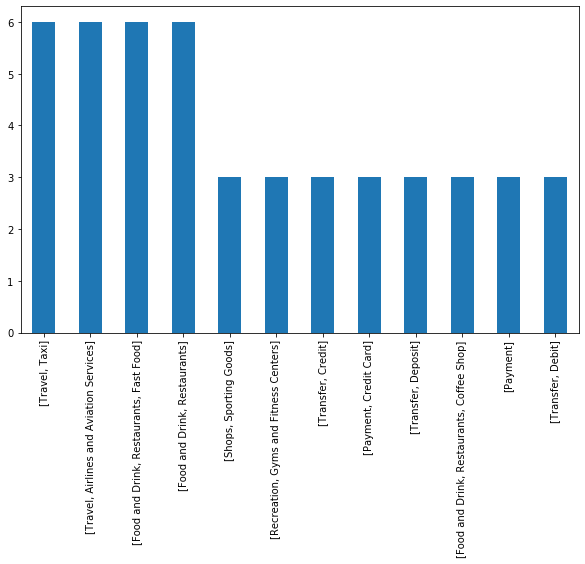

In [167]:
cat.plot.bar(figsize=(10,6))

Calculate the expenses per month

In [168]:
data_df.head(10)

,date,name,amount,category
0,2020-01-31,United Airlines,500.00,"[Travel, Airlines and Aviation Services]"
1,2020-01-29,Uber,6.33,"[Travel, Taxi]"
2,2020-01-26,Tectra Inc,500.00,"[Food and Drink, Restaurants]"
3,2020-01-25,AUTOMATIC PAYMENT - THANK,2078.50,[Payment]
4,2020-01-25,KFC,500.00,"[Food and Drink, Restaurants, Fast Food]"
5,2020-01-25,Madison Bicycle Shop,500.00,"[Shops, Sporting Goods]"
6,2020-01-16,CREDIT CARD 3333 PAYMENT *//,25.00,"[Payment, Credit Card]"
7,2020-01-16,Uber,5.40,"[Travel, Taxi]"
8,2020-01-15,ACH Electronic CreditGUSTO PAY 123456,5850.00,"[Transfer, Debit]"
9,2020-01-15,CD DEPOSIT .INITIAL.,1000.00,"[Transfer, Deposit]"


In [169]:
month_ex = data_df[['date','amount']]


In [170]:
month_ex.head()

,date,amount
0,2020-01-31,500.00
1,2020-01-29,6.33
2,2020-01-26,500.00
3,2020-01-25,2078.50
4,2020-01-25,500.00


In [171]:
month_ex.set_index(['date'], inplace=True)

In [172]:

#month_exp.set_index(['date']).head()
#month_ex['date']=month_ex.astype(timestamp)

In [173]:
#month_ex.set_index(pd.DatetimeIndex(month_ex['date']),infer_datetime=True ).head() 
month_ex.index = pd.to_datetime(month_ex.index)

In [174]:
month_ex.index

DatetimeIndex(['2020-01-31', '2020-01-29', '2020-01-26', '2020-01-25',
               '2020-01-25', '2020-01-25', '2020-01-16', '2020-01-16',
               '2020-01-15', '2020-01-15', '2020-01-14', '2020-01-14',
               '2020-01-13', '2020-01-13', '2020-01-12', '2020-01-11',
               '2020-01-01', '2019-12-30', '2019-12-27', '2019-12-26',
               '2019-12-26', '2019-12-26', '2019-12-17', '2019-12-17',
               '2019-12-16', '2019-12-16', '2019-12-15', '2019-12-15',
               '2019-12-14', '2019-12-14', '2019-12-13', '2019-12-12',
               '2019-12-02', '2019-11-30', '2019-11-27', '2019-11-26',
               '2019-11-26', '2019-11-26', '2019-11-17', '2019-11-17',
               '2019-11-16', '2019-11-16', '2019-11-15', '2019-11-15',
               '2019-11-14', '2019-11-14', '2019-11-13', '2019-11-12'],
              dtype='datetime64[ns]', name='date', freq=None)

In [181]:
month_ex['amount'].resample('M').sum()

date
2019-11-30    10145.24
2019-12-31    10645.24
2020-01-31    11145.24
Freq: M, Name: amount, dtype: float64

In [176]:
#.resample('M')
#month_exp.sum()
month_plot = month_ex['amount'].resample("M").sum()


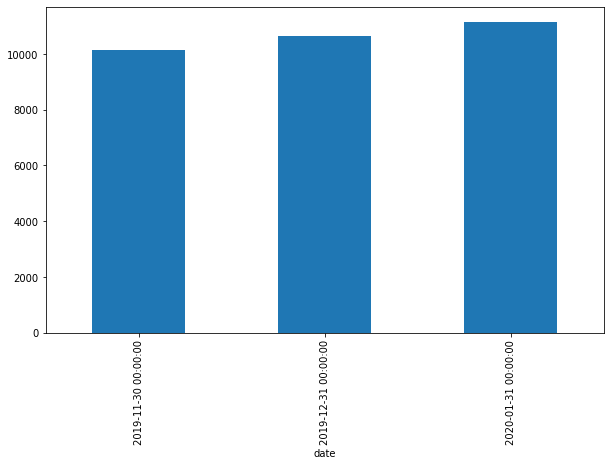

In [180]:
# YOUR CODE HERE

month_plot.plot.bar(figsize=(10,6))